In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [124]:
fs_923_df = pd.read_csv('../data/fs_sept_23.csv')
ce5_923_df = pd.read_csv('../data/ce5_sept_23.csv')
ce6_923_df = pd.read_csv('../data/ce6_sept_23.csv')

In [125]:
ce5_923_df['4'] = ce5_923_df['4'].str.extract(r'(\d)')
ce5_923_df = ce5_923_df.rename(columns={'4':'returncode'})
ce6_923_df['4'] = ce6_923_df['4'].str.extract(r'(\d)')
ce6_923_df = ce6_923_df.rename(columns={'4':'returncode'})

In [45]:
begin_load_df = fs_923_df[fs_923_df['PARTITION'] == 'production']\
                    [['BEGIN', 'USEDMEM', 'CPUS']].rename(columns={'BEGIN':'TIME'})
begin_load_df['ACTION'] = 'begin'

end_load_df = fs_923_df[fs_923_df['PARTITION'] == 'production']\
                    [['END', 'USEDMEM', 'CPUS']].rename(columns={'END':'TIME'})
end_load_df['ACTION'] = 'end'

In [106]:
load_df = begin_load_df.append(end_load_df)
load_df = load_df[load_df['TIME'].str.match(r'2021-09-23')].sort_values('TIME')
load_df['USEDMEM'] = pd.to_numeric(load_df['USEDMEM'].str[:-1], errors='coerce')
load_df['CPUS'] = pd.to_numeric(load_df['CPUS'], errors='coerce')
load_df = load_df.fillna(0)

In [114]:
rows_lst = []
usedmem = 0
cpus = 0
for index, data in load_df.iterrows():
    usedmem = usedmem + data.USEDMEM if data.ACTION == 'begin' else usedmem - data.USEDMEM
    cpus = cpus + data.CPUS if data.ACTION == 'begin' else cpus - data.CPUS
    rows_lst.append([data.TIME, usedmem, cpus])
accumulated_usage_df = pd.DataFrame(rows_lst)
accumulated_usage_df['0'] = pd.to_datetime(accumulated_usage_df[0], format='%Y-%m-%dT%H:%M:%S')

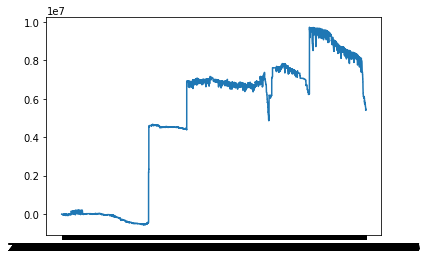

In [115]:
plt.plot(accumulated_usage_df[0], accumulated_usage_df[1])

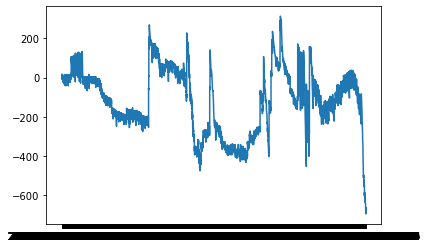

In [120]:
plt.plot(accumulated_usage_df[0], accumulated_usage_df[2])

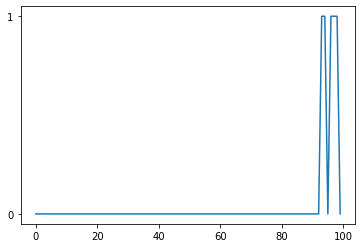

In [118]:
plt.plot(ce5_923_df['returncode'])

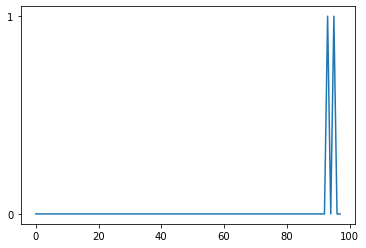

In [119]:
plt.plot(ce6_923_df['returncode'])